In [45]:
import numpy as np  
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [46]:
heart_data = pd.read_csv("heart.csv")

In [47]:
print("Dataset Head:")
heart_data.head(20)


Dataset Head:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,NaN,Normal,156.0,N,1.0,NaN,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,NaN,0.0,Normal,NaN,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0
5,39.0,M,NAP,120.0,339.0,0.0,Normal,170.0,N,0.0,Up,0
6,NaN,NaN,ATA,130.0,237.0,0.0,Normal,170.0,N,0.0,Up,0
7,NaN,M,ATA,NaN,208.0,0.0,NaN,142.0,N,0.0,Up,0
8,37.0,M,ASY,NaN,207.0,NaN,Normal,130.0,Y,1.5,Flat,1
9,48.0,F,ATA,120.0,284.0,0.0,Normal,120.0,N,0.0,Up,0


In [48]:
# Dataset information
print("\nDataset Info:")
heart_data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             839 non-null    float64
 1   Sex             836 non-null    object 
 2   ChestPainType   838 non-null    object 
 3   RestingBP       849 non-null    float64
 4   Cholesterol     849 non-null    float64
 5   FastingBS       841 non-null    float64
 6   RestingECG      839 non-null    object 
 7   MaxHR           846 non-null    float64
 8   ExerciseAngina  857 non-null    object 
 9   Oldpeak         849 non-null    float64
 10  ST_Slope        842 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 86.2+ KB


In [49]:
# Summary statistics
print("\nDataset Summary:")
print(heart_data.describe())



Dataset Summary:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  839.000000  849.000000   849.000000  841.000000  846.000000   
mean    53.401669  132.208481   197.607774    0.230678  137.037825   
std      9.452534   18.354030   109.286723    0.421517   25.572285   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   172.000000    0.000000  120.000000   
50%     54.000000  130.000000   222.000000    0.000000  138.000000   
75%     60.000000  140.000000   266.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  849.000000    918.000000  
mean     0.893640      0.553377  
std      1.072274      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [50]:
# Check for null values
print("\nNull Values in Dataset:")
print(heart_data.isnull().sum())



Null Values in Dataset:
Age               79
Sex               82
ChestPainType     80
RestingBP         69
Cholesterol       69
FastingBS         77
RestingECG        79
MaxHR             72
ExerciseAngina    61
Oldpeak           69
ST_Slope          76
HeartDisease       0
dtype: int64


In [51]:
# Count duplicate rows
print("\nDuplicate Rows Count:", heart_data.duplicated().sum())



Duplicate Rows Count: 0


In [52]:
# Identify numeric and categorical columns
numeric_cols = heart_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = heart_data.select_dtypes(include=['object']).columns

# Numeric columns - fill missing with median
num_imputer = SimpleImputer(strategy='mean')
heart_data[numeric_cols] = num_imputer.fit_transform(heart_data[numeric_cols])

# Categorical columns - fill missing with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
heart_data[categorical_cols] = cat_imputer.fit_transform(heart_data[categorical_cols])


In [53]:
# Drop the 'deck' column due to many missing values
# titanic_data.drop(columns=['deck'], inplace=True)


In [54]:
# Remove duplicate rows
heart_data.drop_duplicates(inplace=True)


<Axes: title={'center': 'Count(target)'}, xlabel='Sex'>

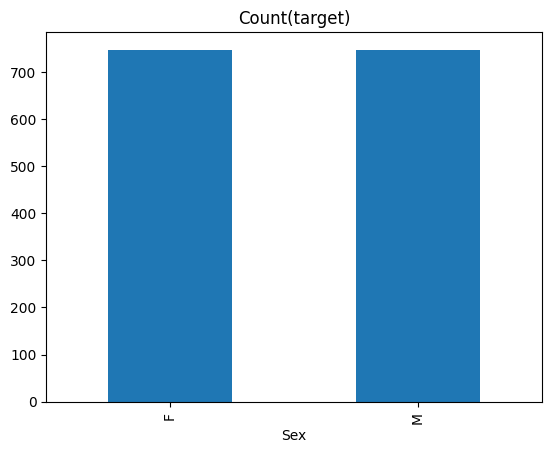

In [55]:
count_class_male, count_class_female = heart_data.Sex.value_counts()

#Divide the data by class

df_class_male =heart_data[heart_data['Sex'] == 'M']

df_class_female= heart_data[heart_data['Sex'] == 'F']

from sklearn.utils import resample

df_class_no_upsampled = resample(df_class_female,
replace=True, #sample with replacement
n_samples = count_class_male ,random_state=42)

df_upsampled = pd.concat([df_class_no_upsampled, df_class_male])

df_upsampled.Sex.value_counts().plot(kind='bar' , title ='Count(target)')

In [56]:
# Identify categorical columns
categorical_cols = df_upsampled.select_dtypes(include=['object']).columns

# One-Hot Encoding
heart_data_encoded = pd.get_dummies(df_upsampled, columns=categorical_cols, drop_first=True)


In [57]:
# # Drop irrelevant columns
# columns_to_drop = ['name', 'ticket', 'cabin', 'class', 'who', 'embark_town', 'alive']
# columns_to_drop_existing = [col for col in columns_to_drop if col in titanic_data.columns]


In [58]:
# if columns_to_drop_existing:
#     titanic_data.drop(columns=columns_to_drop_existing, inplace=True)
#     print(f"\nDropped columns: {columns_to_drop_existing}")


In [59]:
# Final dataset after preprocessing
print("\nDataset After Preprocessing:")
print(heart_data_encoded.head())



Dataset After Preprocessing:
      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
670  41.0      105.0   197.607774   0.000000  168.0  0.00000           0.0   
630  71.0      112.0   149.000000   0.000000  125.0  1.60000           0.0   
41   54.0      130.0   294.000000   0.000000  100.0  0.89364           1.0   
678  60.0      150.0   240.000000   0.230678  171.0  0.90000           0.0   
283  55.0      110.0   344.000000   0.000000  160.0  0.00000           0.0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
670  False               True              False             False   
630  False              False              False             False   
41   False              False               True             False   
678  False              False              False             False   
283  False               True              False             False   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
670   

In [60]:
# Define features (X) and target (y)
X = heart_data_encoded.drop('HeartDisease', axis=1)
y = heart_data_encoded['HeartDisease']


In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , stratify=y, random_state=53)


In [62]:
# Display training and testing data
print("\nTraining Features (X_train):")
print(X_train.head())
print("\nTesting Features (X_test):")
print(X_test.head())



Training Features (X_train):
           Age  RestingBP  Cholesterol  FastingBS       MaxHR  Oldpeak  Sex_M  \
222  48.000000      120.0   197.607774   0.230678  125.000000  0.89364  False   
1    49.000000      160.0   180.000000   0.230678  156.000000  1.00000  False   
248  45.000000      130.0   219.000000   0.000000  130.000000  1.00000   True   
334  53.401669      130.0     0.000000   1.000000  137.037825 -0.70000   True   
912  57.000000      140.0   241.000000   0.000000  137.037825  0.20000  False   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
222              False               True             False   
1                False               True             False   
248              False              False             False   
334              False              False             False   
912              False              False             False   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
222               True        

In [63]:
cont_cols = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

scaler = StandardScaler()
X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])
X_test[cont_cols] = scaler.transform(X_test[cont_cols])


In [64]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [65]:
# Predict using the best model
y_pred = classifier.predict(X_test)

In [66]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")



Accuracy: 91.30%


In [67]:
from sklearn.metrics import classification_report

y_pred = classifier.predict(X_test)

report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       172
         1.0       0.87      0.93      0.90       127

    accuracy                           0.91       299
   macro avg       0.91      0.92      0.91       299
weighted avg       0.91      0.91      0.91       299



In [68]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[155  17]
 [  9 118]]


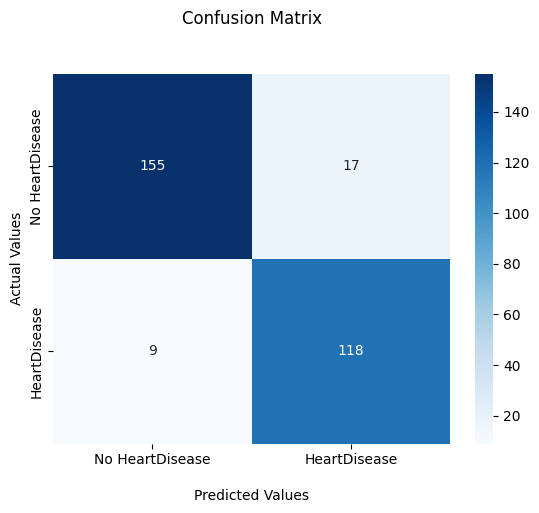

In [69]:
# Visualize the Confusion Matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['No HeartDisease', 'HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease', 'HeartDisease'])
plt.show()


In [70]:
# Actual vs Predicted table for the test set
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Data:")
comparison_df.head(10)



Actual vs Predicted Data:


,Actual,Predicted
630,0.0,0.0
123,1.0,1.0
667,0.0,0.0
65,0.0,0.0
407,1.0,1.0
770,0.0,0.0
901,1.0,1.0
38,0.0,0.0
675,0.0,0.0
371,1.0,1.0


In [71]:
# Manual input for prediction (update these values according to your columns)
# new_instance = np.array([[63, 1, 145, 233, 1, 150, 0, 2, 0, 0, 1]])  # example, adjust length to X.shape[1]


In [72]:
# Step 1: Create a new instance with original columns
new_instance_input = {
    'Age': 55,
    'Sex': 'M',
    'ChestPainType': 'NAP',
    'RestingBP': 145,
    'Cholesterol': 333,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 250,
    'ExerciseAngina': 'N',
    'Oldpeak': 0.0,
    'ST_Slope': 'Up'
}

# Step 2: Convert to DataFrame
new_instance_df = pd.DataFrame([new_instance_input])

# Step 3: Apply One-Hot Encoding on categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
new_instance_encoded = pd.get_dummies(new_instance_df, columns=categorical_cols, drop_first=True)

# Step 4: Add missing columns with 0
for col in X.columns:
    if col not in new_instance_encoded.columns:
        new_instance_encoded[col] = 0

# Step 5: Reorder columns to match X
new_instance_encoded[cont_cols] = new_instance_encoded[cont_cols].astype(float)

# 2. تطبيق scaler على الأعمدة العددية فقط
new_instance_encoded[cont_cols] = scaler.transform(new_instance_encoded[cont_cols])

new_prediction = classifier.predict(new_instance_encoded)


In [73]:
print(f"\nPredicted HeartDisease (0 = No, 1 = Yes): {new_prediction[0]}")



Predicted HeartDisease (0 = No, 1 = Yes): 0.0
